# Введение в искусственные нейронные сети
# Урок 2. Keras

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.datasets import fashion_mnist  # наборы для работы
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

(train_imagesi,train_labels),(test_imagesi,test_labels) = fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


Загрузка Fashion_MNIST

In [3]:
class_names = ["Футболка / топ", "Шорты", "Свитер", 
               "Платье", "Плащ", "Сандали", "Рубашка",
               "Кроссовок", "Сумка", "Ботинок"]


In [4]:
train_imagesi.shape

(60000, 28, 28)

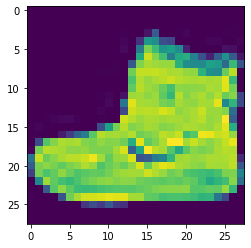

Ботинок


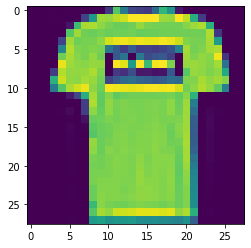

Футболка / топ


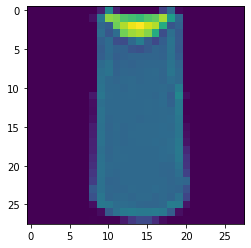

Футболка / топ


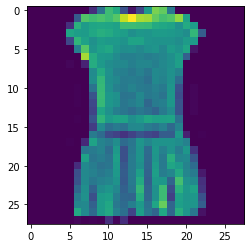

Платье


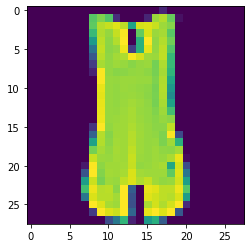

Футболка / топ


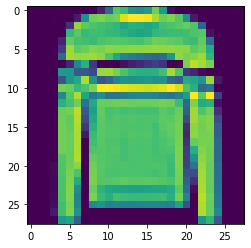

Свитер


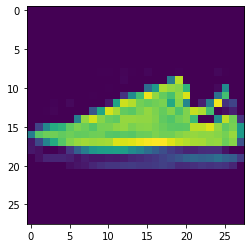

Кроссовок


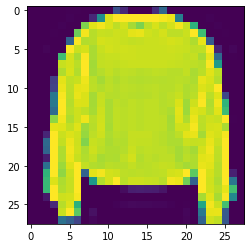

Свитер


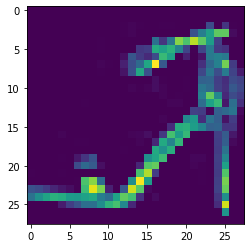

Сандали


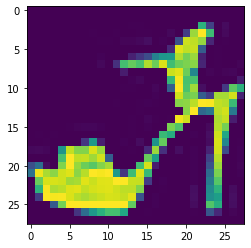

Сандали


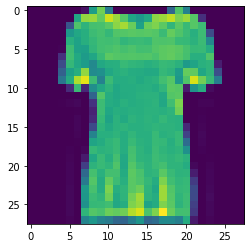

Футболка / топ


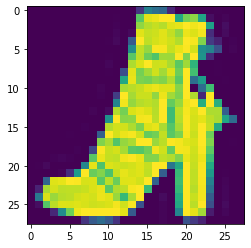

Ботинок


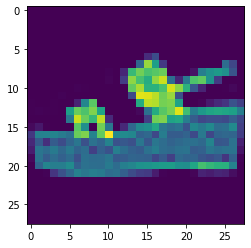

Сандали


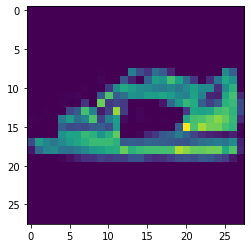

Сандали


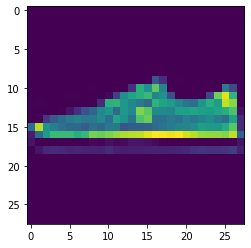

Кроссовок


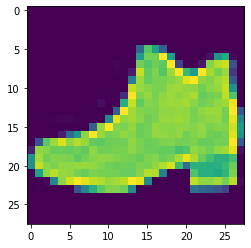

Ботинок


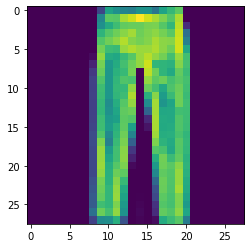

Шорты


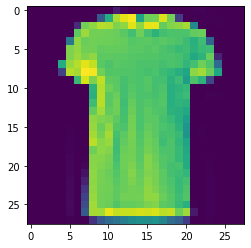

Футболка / топ


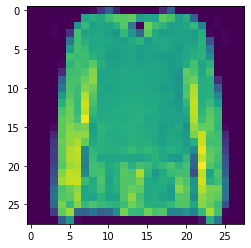

Рубашка


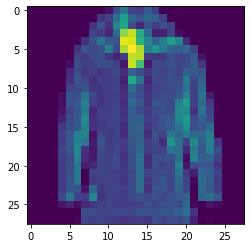

Плащ


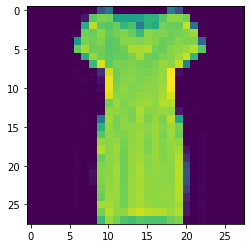

Платье


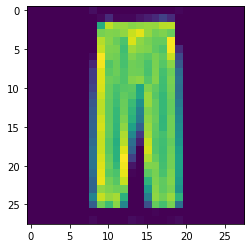

Шорты


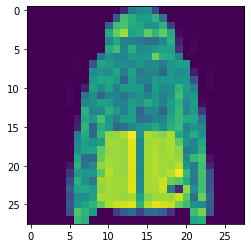

Плащ


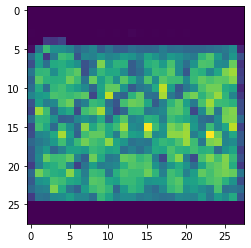

Сумка


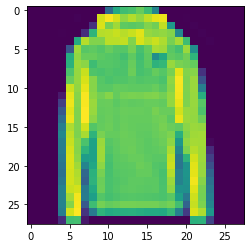

Плащ


In [5]:
for _ in range(25):
  plt.imshow(train_imagesi[_,:,:])
  plt.show()
  print(class_names[train_labels[_]])

In [6]:
keras.backend.backend()

'tensorflow'

**Создание модели**

In [7]:
models_dict = {"models_is": [2, 3, 5, 10], "models": {"models_2": [], "models_3": [], "models_5": [], "models_10": []}}
preds_dict = {"model_names": [], "y_preds": [], "y_classes": []}

Размер набора входных данных для обучения 

In [8]:
train_images.shape

(60000, 784)

In [9]:
for _ in range(4):
  for _i in models_dict["models_is"]:
    model = Sequential(name=f'model_{_i}_{_}')
    model.add(Dense(128, activation='relu', input_shape=(784,)))  
    # входной слой + поносвязный слой из 128 нейронов с активацией ReLU
    for k in range(_i):
      model.add(Dense(10+(10-k)*10, activation='tanh')) 
      # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh
    model.add(Dense(10, activation='softmax')) 
    # выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    models_dict["models"][f"models_{_i}"].append(model)

In [10]:
for _i in models_dict["models_is"]:
    print(len(models_dict['models'][f'models_{_i}']))

4
4
4
4


In [16]:
for model in models_dict["models"].keys():
  models_dict["models"][model][0].summary()

Model: "model_2_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 110)               14190     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               11100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________
Model: "model_3_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
________________________________

Можно подсмотреть как наша модель описана после ее создания

In [17]:
for model in models_dict["models"].keys():
  print(models_dict["models"][model][0].get_config())

{'name': 'model_2_0', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 784), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 110, 'activation': 'tanh', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regula

Превратим выходы в векторые (OHE в keras - from keras.utils import to_categorical)

In [18]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [19]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

In [22]:
y_t[:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
for models in models_dict["models"].items():
  for model in models[1]:
    print(model.get_config()["name"])
  print(_[1])

model_2_0
model_2_1
model_2_2
model_2_3
[<keras.engine.sequential.Sequential object at 0x7fd267dd7350>, <keras.engine.sequential.Sequential object at 0x7fd267bfa610>, <keras.engine.sequential.Sequential object at 0x7fd2688b8690>, <keras.engine.sequential.Sequential object at 0x7fd2682f2f50>]
model_3_0
model_3_1
model_3_2
model_3_3
[<keras.engine.sequential.Sequential object at 0x7fd267dd7350>, <keras.engine.sequential.Sequential object at 0x7fd267bfa610>, <keras.engine.sequential.Sequential object at 0x7fd2688b8690>, <keras.engine.sequential.Sequential object at 0x7fd2682f2f50>]
model_5_0
model_5_1
model_5_2
model_5_3
[<keras.engine.sequential.Sequential object at 0x7fd267dd7350>, <keras.engine.sequential.Sequential object at 0x7fd267bfa610>, <keras.engine.sequential.Sequential object at 0x7fd2688b8690>, <keras.engine.sequential.Sequential object at 0x7fd2682f2f50>]
model_10_0
model_10_1
model_10_2
model_10_3
[<keras.engine.sequential.Sequential object at 0x7fd267dd7350>, <keras.engine

Предсказания модели до обучения

In [37]:
for models in models_dict["models"].items():
  for model in models[1]:
    print(model.get_config()["name"])
    y_pred = model.predict(test_images[:3,:])
    y_class = np.argmax(y_pred, axis=1)
    preds_dict["model_names"].append(model.get_config()["name"])
    preds_dict["y_preds"].append(y_pred)
    preds_dict["y_classes"].append(y_class)
preds_dict

model_2_0
model_2_1
model_2_2
model_2_3
model_3_0
model_3_1
model_3_2
model_3_3
model_5_0
model_5_1
model_5_2
model_5_3
model_10_0
model_10_1
model_10_2
model_10_3


{'model_names': ['model_2_0',
  'model_2_1',
  'model_2_2',
  'model_2_3',
  'model_3_0',
  'model_3_1',
  'model_3_2',
  'model_3_3',
  'model_5_0',
  'model_5_1',
  'model_5_2',
  'model_5_3',
  'model_10_0',
  'model_10_1',
  'model_10_2',
  'model_10_3'],
 'y_classes': [array([2, 6, 7]),
  array([5, 1, 5]),
  array([8, 2, 2]),
  array([0, 5, 0]),
  array([2, 2, 2]),
  array([9, 4, 9]),
  array([5, 4, 5]),
  array([9, 9, 9]),
  array([7, 0, 3]),
  array([6, 4, 6]),
  array([9, 4, 4]),
  array([3, 8, 9]),
  array([7, 5, 3]),
  array([4, 9, 7]),
  array([8, 0, 0]),
  array([3, 7, 3])],
 'y_preds': [array([[0.05590706, 0.06588965, 0.26337615, 0.07776198, 0.07375304,
          0.13229239, 0.09824526, 0.11089592, 0.05757785, 0.06430073],
         [0.11373514, 0.12895294, 0.06516464, 0.04178649, 0.05016603,
          0.06652349, 0.20669518, 0.06489376, 0.16498394, 0.09709833],
         [0.12571704, 0.04511725, 0.07901161, 0.05328916, 0.13779834,
          0.05694011, 0.1396456 , 0.1793707

Сделаем цикл тренировки модели

In [38]:
for models in models_dict["models"].items():
  for model in models[1]:
    # Train the model.
    model.fit(  
      train_images[:,:],
      y_t[:,:],
      epochs=15,
      batch_size=32,
      validation_split=0.2
    )

    # Evaluate the model.
    model.evaluate( 
      test_images,
      y_tt
    )

    # Predict on the first 5 test images.
    predictions = model.predict(test_images[:5])

    # Print our model's predictions.
    print(np.argmax(predictions, axis=1)) # 

    # Check our predictions against the ground truths.
    print(test_labels[:5]) # 

Epoch 1/15
1500/1500 [==============================] - 14s 4ms/step - loss: 0.6032 - accuracy: 0.7825 - val_loss: 0.4089 - val_accuracy: 0.8534
Epoch 2/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3924 - accuracy: 0.8558 - val_loss: 0.3809 - val_accuracy: 0.8603
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3567 - accuracy: 0.8683 - val_loss: 0.3850 - val_accuracy: 0.8612
Epoch 4/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3270 - accuracy: 0.8794 - val_loss: 0.3552 - val_accuracy: 0.8699
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3053 - accuracy: 0.8853 - val_loss: 0.3492 - val_accuracy: 0.8702
Epoch 6/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2948 - accuracy: 0.8896 - val_loss: 0.3602 - val_accuracy: 0.8698
Epoch 7/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2787 - accuracy: 0.8958 - val_loss: 0.3297 - val_accuracy

In [39]:
preds_dict["fit_model_names"] = []
preds_dict["fit_y_preds"] = []
preds_dict["fit_y_classes"] = []
for models in models_dict["models"].items():
  for model in models[1]:
    print(model.get_config()["name"])
    y_pred = model.predict(test_images[:3,:])
    y_class = np.argmax(y_pred, axis=1)
    preds_dict["fit_model_names"].append(model.get_config()["name"])
    preds_dict["fit_y_preds"].append(y_pred)
    preds_dict["fit_y_classes"].append(y_class)
preds_dict

model_2_0
model_2_1
model_2_2
model_2_3
model_3_0
model_3_1
model_3_2
model_3_3
model_5_0
model_5_1
model_5_2
model_5_3
model_10_0
model_10_1
model_10_2
model_10_3


{'fit_model_names': ['model_2_0',
  'model_2_1',
  'model_2_2',
  'model_2_3',
  'model_3_0',
  'model_3_1',
  'model_3_2',
  'model_3_3',
  'model_5_0',
  'model_5_1',
  'model_5_2',
  'model_5_3',
  'model_10_0',
  'model_10_1',
  'model_10_2',
  'model_10_3'],
 'fit_y_classes': [array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1]),
  array([9, 2, 1])],
 'fit_y_preds': [array([[2.9882762e-07, 2.1187757e-06, 2.1185919e-08, 1.5587803e-07,
          5.5198353e-07, 2.9619805e-05, 8.3502513e-08, 4.9475871e-04,
          2.1211847e-07, 9.9947220e-01],
         [9.0384588e-04, 9.7383062e-09, 9.9830222e-01, 9.8611981e-06,
          4.3021221e-04, 2.6943155e-06, 3.2960362e-04, 1.3874189e-06,
          1.9744970e-05, 4.1042659e-07],
         [1.9499824e-

Сохраним модель на диск

In [40]:
# сохранить веса модели.
for models in models_dict["models"].items():
  for model in models[1]:
    
    model.save_weights(f"{model.get_config()['name']}_weights.h5")

# загрузить веса модели:
# model.load_weights('model.h5')


In [49]:
for models in models_dict["models"].items():
  for model in models[1]:
    model.evaluate(
      test_images,
      to_categorical(test_labels)
    )

313/313 [==============================] - 1s 4ms/step - loss: 0.3625 - accuracy: 0.8766


In [56]:
for models in models_dict["models"].items():
  for model in models[1]:
    print(model.get_config()["name"])

model_2_0
model_2_1
model_2_2
model_2_3
model_3_0
model_3_1
model_3_2
model_3_3
model_5_0
model_5_1
model_5_2
model_5_3
model_10_0
model_10_1
model_10_2
model_10_3


In [57]:
# Train the model. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh_dict =  {"hh_models": []}
for models in models_dict["models"].items():
  for model in models[1]:
    hh_dict['hh_models'].append(model.fit( 
      train_images,
      to_categorical(train_labels),
      epochs=15,
      batch_size=32, validation_split=0.2
    ))

    # Evaluate the model.
    model.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    # Predict on the first 5 test images.
    predictions = model.predict(test_images[:5])

    # Print our model's predictions.
    print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

    # Check our predictions against the ground truths.
    print(test_labels[:5]) # [7, 2, 1, 0, 4]

Epoch 1/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2077 - accuracy: 0.9216 - val_loss: 0.3363 - val_accuracy: 0.8860
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2019 - accuracy: 0.9246 - val_loss: 0.3355 - val_accuracy: 0.8887
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1934 - accuracy: 0.9275 - val_loss: 0.3385 - val_accuracy: 0.8870
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1905 - accuracy: 0.9289 - val_loss: 0.3334 - val_accuracy: 0.8861
Epoch 5/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1887 - accuracy: 0.9292 - val_loss: 0.3577 - val_accuracy: 0.8817
Epoch 6/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1812 - accuracy: 0.9336 - val_loss: 0.3626 - val_accuracy: 0.8830
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1800 - accuracy: 0.9324 - val_loss: 0.3419 - val_accuracy:

In [41]:
for models in models_dict["models"].items():
  for model in models[1]:
    model.fit(
        train_images,
        y_t,
        epochs=3,
        batch_size=1024,
        validation_split=0.2
        )

Epoch 1/3
47/47 [==============================] - 1s 9ms/step - loss: 0.1683 - accuracy: 0.9386 - val_loss: 0.3129 - val_accuracy: 0.8955
Epoch 2/3
47/47 [==============================] - 0s 8ms/step - loss: 0.1498 - accuracy: 0.9457 - val_loss: 0.3130 - val_accuracy: 0.8942
Epoch 3/3
47/47 [==============================] - 0s 8ms/step - loss: 0.1442 - accuracy: 0.9485 - val_loss: 0.3124 - val_accuracy: 0.8958
Epoch 1/3
47/47 [==============================] - 1s 9ms/step - loss: 0.1696 - accuracy: 0.9379 - val_loss: 0.3105 - val_accuracy: 0.8924
Epoch 2/3
47/47 [==============================] - 0s 8ms/step - loss: 0.1481 - accuracy: 0.9473 - val_loss: 0.3089 - val_accuracy: 0.8952
Epoch 3/3
47/47 [==============================] - 0s 8ms/step - loss: 0.1418 - accuracy: 0.9498 - val_loss: 0.3091 - val_accuracy: 0.8948
Epoch 1/3
47/47 [==============================] - 1s 9ms/step - loss: 0.1764 - accuracy: 0.9341 - val_loss: 0.3094 - val_accuracy: 0.8938
Epoch 2/3
47/47 [==========

In [50]:
for models in models_dict["models"].items():
  for model in models[1]:
    plt.figure(figsize=(15,7))
    plt.plot(model.history['loss'], label = 'потери для тренировки')
    plt.plot(model.history['val_loss'], label = 'потери для валидации')
    plt.xlabel('эпох')
    plt.ylabel('loss')
    plt.legend()
    plt.grid('On')
    plt.title('потери от эпох')
    plt.show()


TypeError: ignored

<Figure size 1080x504 with 0 Axes>

Покажем как выглядит кривая обучения

In [47]:
models_dict["models"]["models_2"][0].history

TypeError: ignored

In [ ]:
hh

Эксперимент с разными оптимизаторами для одной начальной модели:

  - создаем модель model
  - сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
  - создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры) 
  - загружаем веса modeli.load_weights('model.h5')
  - компилируем modeli с одним из оптимизаторов
  - вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
  - проводим обучение модели и пишем ошибки в истории hh
  - выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных



Оптимизаторы:
* SGD() (с или без моментум)
* RMSprop()
* Adam()
* Adagrad()
…


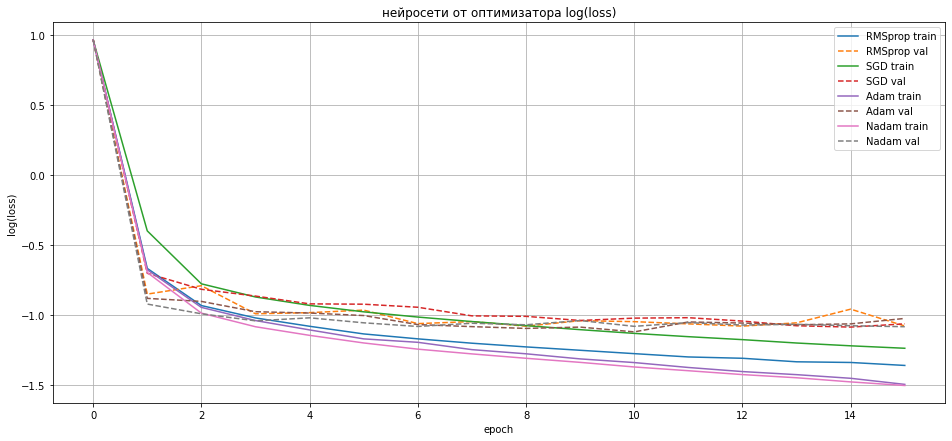

In [ ]:
# создаем модель model
model = Sequential([
                      Dense( 64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для вывод результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы
for i_optim in [keras.optimizers.RMSprop(),keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


In [ ]:
 modeli.optimizer.get_config()

{'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.004,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Nadam'}

Посмотрим на результат предсказаний  (inference) для обученной модели (последняя в цикле)

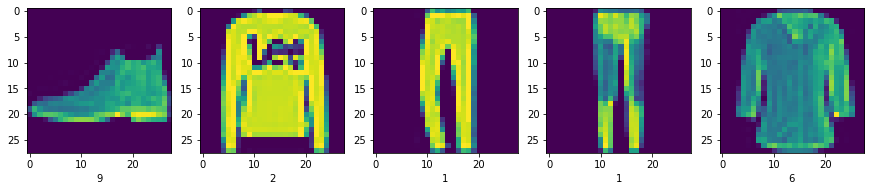

In [ ]:
N = 5
y_pred = modeli.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

In [ ]:
y_pred_class

array([9, 2, 1, 1, 6])

Вариант синтаксиса:

In [ ]:
y_predi = modeli(test_images[:N,:])
np.argmax(y_predi,axis=1)

array([9, 2, 1, 1, 6])